<a href="https://colab.research.google.com/github/ArunDharavath/ML-projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

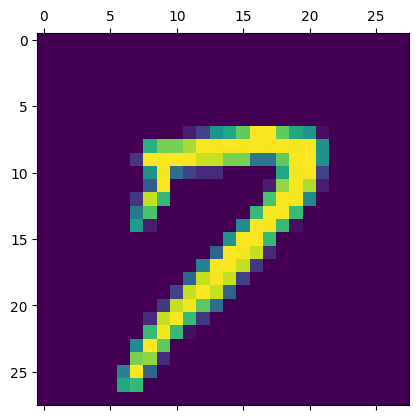

In [ ]:
plt.matshow(X_train[599])

In [ ]:
y_train[599]

7

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4678 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9261


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.9247


[0.2693350315093994, 0.9247000217437744]

In [ ]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[599])

313/313 [==============================] - 1s 2ms/step


9

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,    9,  929,   17,    9,    2,   12,    9,   33,    5],
       [   4,    0,   21,  920,    1,   24,    2,    8,   17,   13],
       [   1,    1,    5,    1,  922,    0,    8,    3,    6,   35],
       [  11,    2,    5,   31,   11,  773,   19,    5,   26,    9],
       [  14,    3,    9,    1,    8,   10,  910,    2,    1,    0],
       [   1,    5,   26,    5,    9,    0,    0,  945,    2,   35],
       [  10,   10,    7,   21,   10,   29,   10,   11,  845,   21],
       [  11,    7,    1,    8,   30,    7,    0,   16,    4,  925]],
      dtype=int32)>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2834 - accuracy: 0.9190
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1304 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0541 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0418 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0283 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02